<a href="https://colab.research.google.com/github/krithikakondapalli/kpmg1c/blob/main/kpmg_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML.ENERGY Data Insights
Sources/Reference: Dr. Uohna Thiessen's Guide

Data Source: https://github.com/ml-energy/leaderboard
Hugging Face: https://huggingface.co/spaces/ml-energy/leaderboard/tree/main

## Step 0: Import Libraries

In [1]:
import pandas as pd
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported libraries successfully.")

Imported libraries successfully.


## Step 1: Import Data from ML.Energy Leaderboard

In [35]:
# insert all urls of data needed
url_list_text_generation_chat = ['https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/google/gemma-2-2b-it/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/google/gemma-2-27b-it/bs128%2Btp4%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/google/gemma-2-9b-it/bs127%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/meta-llama/Meta-Llama-3.1-70B-Instruct/bs128%2Btp8%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/meta-llama/Meta-Llama-3.1-8B-Instruct/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/microsoft/Phi-3-medium-4k-instruct/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/microsoft/Phi-3-mini-4k-instruct/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/microsoft/Phi-3-small-8k-instruct/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/mistralai/Mistral-7B-Instruct-v0.3/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/mistralai/Mistral-Large-Instruct-2407/bs128%2Btp8%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/mistralai/Mistral-Nemo-Instruct-2407/bs128%2Btp1%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/mistralai/Mixtral-8x22B-Instruct-v0.1-pp1/bs32%2Btp8%2Bpp1.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/mistralai/Mixtral-8x22B-Instruct-v0.1/bs1024%2Btp8%2Bpp2.json',
  'https://huggingface.co/spaces/ml-energy/leaderboard/resolve/main/data/llm_text_generation/chat/A100-SXM4-40GB/mistralai/Mixtral-8x7B-Instruct-v0.1/bs1024%2Btp4%2Bpp1.json'

]

all_data = []

for url in url_list_text_generation_chat:
    response = requests.get(url)
    try:
        data = response.json()  # this will work only if the URL returns JSON
        all_data.append(data)
    except Exception as e:
        print(f"Failed to parse JSON from {url}: {e}")

print(all_data)

[{'Model': 'google/gemma-2-2b-it', 'GPU': 'NVIDIA A100-SXM4-40GB', 'TP': 1, 'PP': 1, 'Energy/req (J)': 43.65870680242352, 'Avg TPOT (s)': 0.06883843431885941, 'Token tput (tok/s)': 1761.8863043222862, 'Avg Output Tokens': 484.5048, 'Avg BS (reqs)': 127.76606114311032, 'Max BS (reqs)': 128}, {'Model': 'google/gemma-2-27b-it', 'GPU': 'NVIDIA A100-SXM4-40GB', 'TP': 4, 'PP': 1, 'Energy/req (J)': 230.644433524673, 'Avg TPOT (s)': 0.11220224938943191, 'Token tput (tok/s)': 1051.3354539260472, 'Avg Output Tokens': 392.47133333333335, 'Avg BS (reqs)': 127.72361537073786, 'Max BS (reqs)': 128}, {'Model': 'google/gemma-2-9b-it', 'GPU': 'NVIDIA A100-SXM4-40GB', 'TP': 1, 'PP': 1, 'Energy/req (J)': 68.23646588230595, 'Avg TPOT (s)': 0.09567698657715788, 'Token tput (tok/s)': 1219.5358652363277, 'Avg Output Tokens': 380.6235, 'Avg BS (reqs)': 126.59576776994031, 'Max BS (reqs)': 127}, {'Model': 'meta-llama/Meta-Llama-3.1-70B-Instruct', 'GPU': 'NVIDIA A100-SXM4-40GB', 'TP': 8, 'PP': 1, 'Energy/req (J

In [43]:
# Convert into a pandas data frame
from pandas import json_normalize

df = json_normalize(all_data)
df.insert(0, "Task_Type", "llm_text_generation/chat")
df.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,llm_text_generation/chat,google/gemma-2-2b-it,NVIDIA A100-SXM4-40GB,1,1,43.658707,0.068838,1761.886304,484.504800,127.766061,128
1,llm_text_generation/chat,google/gemma-2-27b-it,NVIDIA A100-SXM4-40GB,4,1,230.644434,0.112202,1051.335454,392.471333,127.723615,128
2,llm_text_generation/chat,google/gemma-2-9b-it,NVIDIA A100-SXM4-40GB,1,1,68.236466,0.095677,1219.535865,380.623500,126.595768,127
3,llm_text_generation/chat,meta-llama/Meta-Llama-3.1-70B-Instruct,NVIDIA A100-SXM4-40GB,8,1,529.104846,0.147618,828.035487,455.842000,127.756340,128
4,llm_text_generation/chat,meta-llama/Meta-Llama-3.1-8B-Instruct,NVIDIA A100-SXM4-40GB,1,1,59.602566,0.079266,1516.767980,480.943000,127.763238,128


In [ ]:
# Add other task_types: llm_text_generation/code, multimodal mllm_text_generation/chat, diffusion/image-to-video, diffusion/text-to-image, diffusion/text-to-video


# Other Data: ML.Energy Leaderboard
ML.Energy Leaderboard also contains csv files with the following columns: model, throughput, response_length, latency, energy

Source: https://github.com/ml-energy/leaderboard/tree/master/data/legacy

It is under the legacy folder.

# AI Energy Score Dataset Insights
Data Source: We transferred the data from this website into our own excel sheet, then converted it into a csv file.
- Website: https://huggingface.co/spaces/AIEnergyScore/Leaderboard

In [4]:
# need to mount to access csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1: Load Data into a data frame

In [11]:
file_path = '/content/drive/MyDrive/KPMG 1C/ai-energy-score-data.csv'
df = pd.read_csv(file_path, thousands=",")
df.head()

,Model Class (Only for Text Generation),Model Name,Provider,GPU Energy (Wh) per 1k tasks,Score (Max 5 Stars),Score (# format),Task Type,https://huggingface.co/spaces/AIEnergyScore/Leaderboard
0,A (Single Consumer GPU) <20B parameters,distilgpt2,distilbert,1.31,★★★★★,5,Text Generation,NaN
1,A (Single Consumer GPU) <20B parameters,opt-125m,facebook,1.94,★★★★★,5,Text Generation,NaN
2,A (Single Consumer GPU) <20B parameters,gpt2,openai-community,2.15,★★★★★,5,Text Generation,NaN
3,A (Single Consumer GPU) <20B parameters,openai-gpt,openai-community,2.70,★★★★★,5,Text Generation,NaN
4,A (Single Consumer GPU) <20B parameters,gpt2-medium,openai-community,3.96,★★★★★,5,Text Generation,NaN


Step 2: Clean Data (Drop unnecessary columns, rename, and convert types)

In [12]:
df = df.drop(columns=[
    'https://huggingface.co/spaces/AIEnergyScore/Leaderboard',
    'Score (Max 5 Stars)'
])
df.columns = [
    "Model_Class",
    "Model_Name",
    "Provider",
    "GPU_Energy_Wh_per_1k",
    "Score",
    "Task_Type"
]
df["GPU_Energy_Wh_per_1k"] = pd.to_numeric(df["GPU_Energy_Wh_per_1k"], errors="coerce")
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")
print(df.dtypes)
print(df.head())

Model_Class              object
Model_Name               object
Provider                 object
GPU_Energy_Wh_per_1k    float64
Score                     int64
Task_Type                object
dtype: object
                               Model_Class   Model_Name          Provider  \
0  A (Single Consumer GPU) <20B parameters   distilgpt2        distilbert   
1  A (Single Consumer GPU) <20B parameters     opt-125m          facebook   
2  A (Single Consumer GPU) <20B parameters         gpt2  openai-community   
3  A (Single Consumer GPU) <20B parameters   openai-gpt  openai-community   
4  A (Single Consumer GPU) <20B parameters  gpt2-medium  openai-community   

   GPU_Energy_Wh_per_1k  Score        Task_Type  
0                  1.31      5  Text Generation  
1                  1.94      5  Text Generation  
2                  2.15      5  Text Generation  
3                  2.70      5  Text Generation  
4                  3.96      5  Text Generation  


Step 3: Explore Data

In [13]:
print(df.info())      # column types + null counts
print(df.describe())  # basic stats for numeric columns
print(df['Task_Type'].value_counts())  # what kinds of tasks exist


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model_Class           40 non-null     object 
 1   Model_Name            320 non-null    object 
 2   Provider              320 non-null    object 
 3   GPU_Energy_Wh_per_1k  320 non-null    float64
 4   Score                 320 non-null    int64  
 5   Task_Type             320 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.1+ KB
None
       GPU_Energy_Wh_per_1k       Score
count            320.000000  320.000000
mean             121.582094    4.028125
std              416.320707    1.374587
min                0.060000    1.000000
25%                0.807500    3.000000
50%                4.130000    5.000000
75%               21.520000    5.000000
max             3426.380000    5.000000
Task_Type
ALL TASKS                       154
Text Generatio

In [15]:
# Draw insights on All Tasks Energy Data: All tasks is the overall energy consumption for all the tasks, not just a specific kind
df_all = df[df["Task_Type"] == "ALL TASKS"].copy()
print(df_all.shape)
print(df_all.head())
print('\nThis is information regarding the GPU Energy for the All tasks column: ')
print(df_all["GPU_Energy_Wh_per_1k"].describe())

# check columns with null values
print(df.isna().sum())

(154, 6)
    Model_Class                   Model_Name     Provider  \
166         NaN  bert-tiny-finetuned-squadv2      mrm8488   
167         NaN        GIST-all-MiniLM-L6-v2  avsolatorio   
168         NaN            bge-small-en-v1.5         BAAI   
169         NaN             dynamic_tinybert        Intel   
170         NaN              distilbert-imdb      lvwerra   

     GPU_Energy_Wh_per_1k  Score  Task_Type  
166                  0.06      5  ALL TASKS  
167                  0.11      5  ALL TASKS  
168                  0.19      5  ALL TASKS  
169                  0.21      5  ALL TASKS  
170                  0.22      5  ALL TASKS  

This is information regarding the GPU Energy for the All tasks column: 
count     154.000000
mean      124.822273
std       424.624960
min         0.060000
25%         0.785000
50%         3.965000
75%        20.445000
max      3426.380000
Name: GPU_Energy_Wh_per_1k, dtype: float64
Model_Class             280
Model_Name                0
Provider

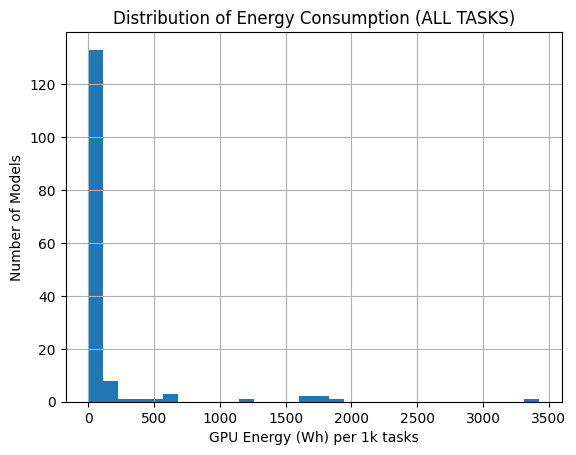


Analysis:
The majority of models fall under the 0-200 Wh per 1k tasks. Thus, They are fairly efficient. The data seemed left skewed.


In [16]:
# Histogram
df_all["GPU_Energy_Wh_per_1k"].hist(bins=30)
plt.xlabel("GPU Energy (Wh) per 1k tasks")
plt.ylabel("Number of Models")
plt.title("Distribution of Energy Consumption (ALL TASKS)")
plt.show()

print("\nAnalysis:")
print("The majority of models fall under the 0-200 Wh per 1k tasks. Thus, They are fairly efficient. The data seemed left skewed.")

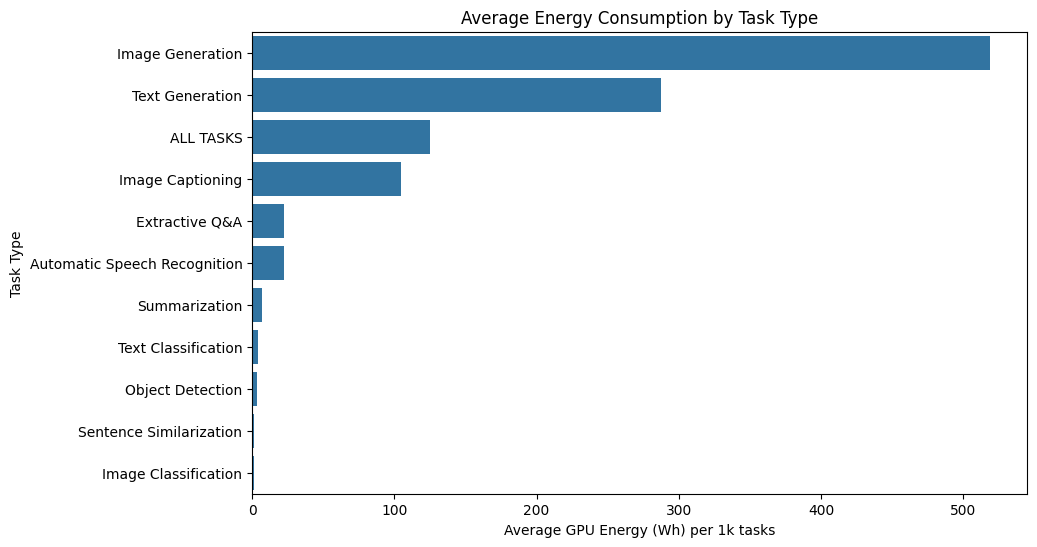

In [17]:
# Group the models by task type to extract which task consumes the most energy by calculating mean GPU energy
task_energy = df.groupby("Task_Type")["GPU_Energy_Wh_per_1k"].mean().sort_values(ascending=False)
task_energy

# bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=task_energy.values, y=task_energy.index)
plt.xlabel("Average GPU Energy (Wh) per 1k tasks")
plt.ylabel("Task Type")
plt.title("Average Energy Consumption by Task Type")
plt.show()

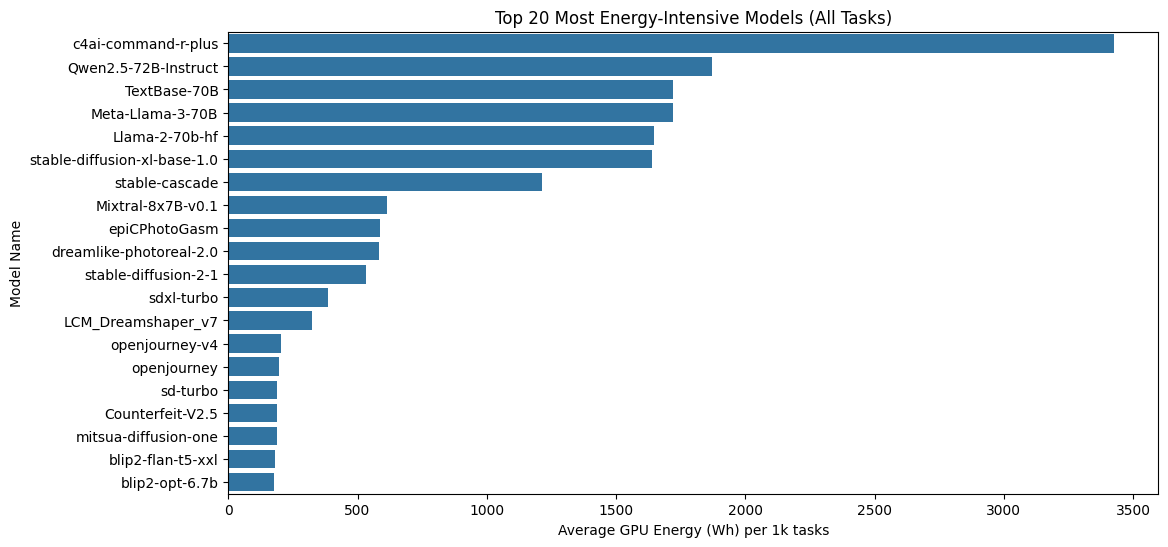

In [20]:
# Order which models consume the most energy
model_avg_energy = df.groupby("Model_Name")["GPU_Energy_Wh_per_1k"].mean().sort_values(ascending=False)
model_avg_energy.head(10)  # Show top 10 highest energy models

model_avg_energy_df = model_avg_energy.reset_index()
model_avg_energy_df.columns = ["Model_Name", "Avg_GPU_Energy_Wh_per_1k"]
model_avg_energy_df.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Avg_GPU_Energy_Wh_per_1k", y="Model_Name", data=model_avg_energy_df.head(20))
plt.xlabel("Average GPU Energy (Wh) per 1k tasks")
plt.ylabel("Model Name")
plt.title("Top 20 Most Energy-Intensive Models (All Tasks)")
plt.show()


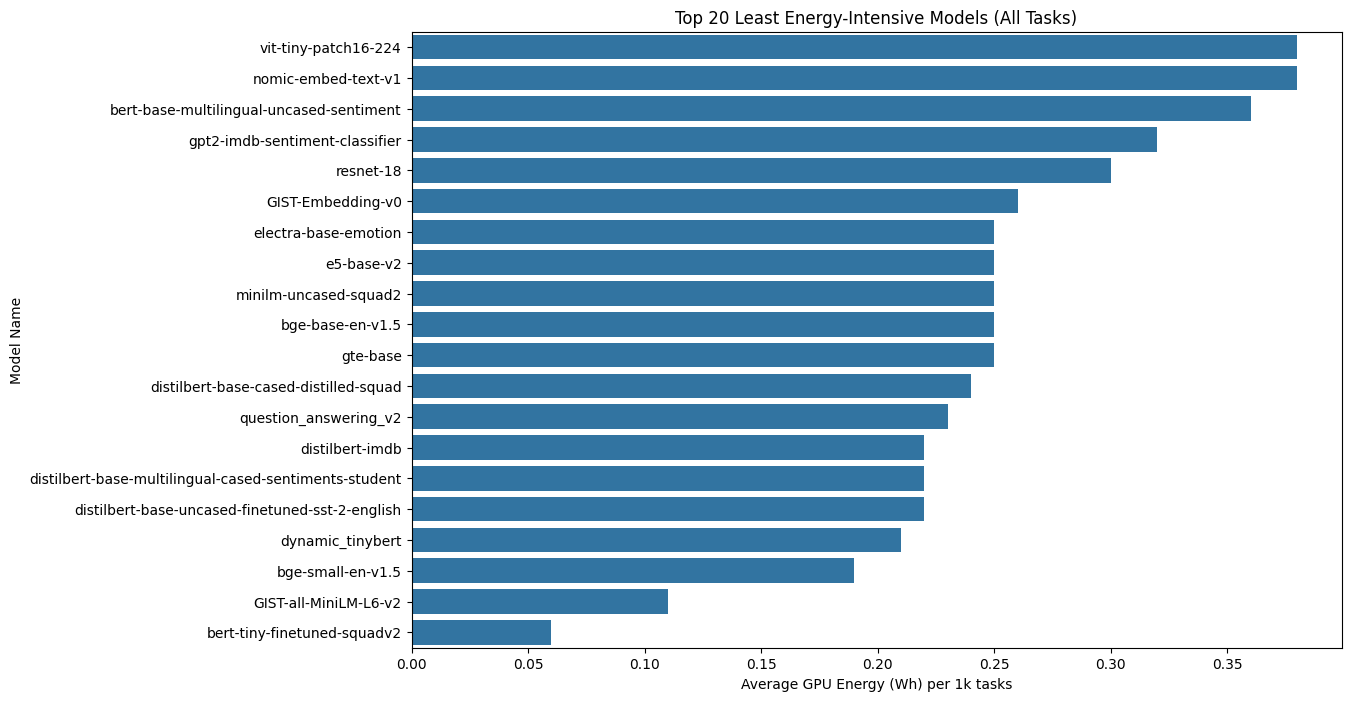

In [19]:
# View the most energy efficient models instead
bottom20_models = model_avg_energy_df.tail(20)

plt.figure(figsize=(12,8))
sns.barplot(x="Avg_GPU_Energy_Wh_per_1k", y="Model_Name", data=bottom20_models)
plt.xlabel("Average GPU Energy (Wh) per 1k tasks")
plt.ylabel("Model Name")
plt.title("Top 20 Least Energy-Intensive Models (All Tasks)")
plt.show()